In [4]:
%matplotlib inline
import numpy as np
import lmfit as lm
import matplotlib.pyplot as plt

In [2]:
# create some data
n = 10
x = np.linspace(-5,5,11)

data = None

slope = []
# create n lines with intercepts 0.1
for i in range(n):
    slope.append(np.random.rand())
    y = 0.1 + slope[-1]*x + np.random.normal(0,.5,11)
    
    if data is None:
        data = y
    else:
        data = np.vstack((data,y))

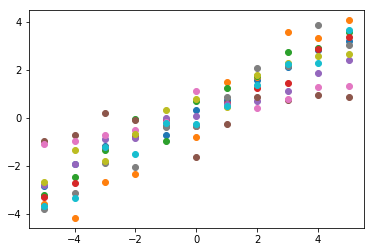

In [5]:
for y in data:
    plt.plot(x,y,"o")

In [6]:
linModel = lm.models.LinearModel()

lin_slope = []
lin_intercept = []

for y in data:
    pars = linModel.guess(y,x=x)
    out = linModel.fit(y, pars, x=x)
    #    print(out.fit_report(min_correl=0.25))
    lin_slope.append(out.values['slope'])
    lin_intercept.append(out.values['intercept'])

In [7]:
# the fit is ok on an individual basis but it misses the point that the intercept is the same for all datasets
for i in range(n):
    print(slope[i],lin_slope[i],lin_intercept[i])

0.620924227563017 0.5895466138662002 0.29669656643955994
0.8258897013322491 0.8788465183414554 0.031538399135191075
0.667433012546893 0.6659627561913657 0.4435791218441798
0.6046542882619796 0.6228308062430906 0.09011309069909007
0.3950911096602875 0.46060659296615375 0.01632532238866048
0.24201009742669155 0.17604765092689972 -0.045618842512293804
0.17204638619916046 0.25473551893942603 0.16760685007368714
0.7249998313411706 0.7608053746571889 0.03481576769556815
0.6355437096947216 0.5394254290104457 0.3896076036975852
0.7755687346370189 0.6895570146365316 -0.02275191478667994


In [9]:
data.shape[0]

10

In [21]:
def multiple_lines(parms,x,data=None,sigma=None):
    intercept = parms['intercept']
    model = None
    if data is not None:
        for i in range(data.shape[0]):
            slope = params['slope'+str(i)]
            y = intercept + slope*x
            if model is None:
                model = y
            else:
                model = np.vstack((model,y))
        if sigma is None:
            return model-data
        else:
            return (model-data)/sigma

In [23]:
params = lm.Parameters()
params.add('intercept',value=0,vary=True)
for i,s in enumerate(slope):
    params.add('slope'+str(i),value=s,vary=True)
    
out = lm.minimize(multiple_lines, params, args=(x,data),nan_policy='omit')
out.params.pretty_print()


Name          Value      Min      Max   Stderr     Vary     Expr Brute_Step
intercept    0.1402     -inf      inf     None     True     None     None
slope0       0.6209     -inf      inf     None     True     None     None
slope1       0.8259     -inf      inf     None     True     None     None
slope2       0.6674     -inf      inf     None     True     None     None
slope3       0.6047     -inf      inf     None     True     None     None
slope4       0.3951     -inf      inf     None     True     None     None
slope5        0.242     -inf      inf     None     True     None     None
slope6        0.172     -inf      inf     None     True     None     None
slope7        0.725     -inf      inf     None     True     None     None
slope8       0.6355     -inf      inf     None     True     None     None
slope9       0.7756     -inf      inf     None     True     None     None
